In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data into a pandas DataFrame
# Replace 'bankloandata.csv' with the actual file name or path
df = pd.read_excel('/content/samplebankloandata.xlsx')

# Display basic information about the DataFrame
print(df.info())

# Display summary statistics for numeric columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


# Assuming 'data' contains the DataFrame
# Replace 'data' with your DataFrame variable name

# Convert data.describe() to DataFrame
describe_df = pd.DataFrame(df.describe())

# Convert data.shape to DataFrame
shape_df = pd.DataFrame(df.shape, columns=['Rows', 'Columns'])

# Print the DataFrames
print(describe_df)
print("------------------------")
print(shape_df)


# Univariate Analysis
# Example: Histogram of loan_amount
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amount'], bins=20, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis
# Example: Scatter plot of loan_amount vs. annual_inc
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amount', data=df)
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

# Multivariate Analysis (only for numeric columns)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualization of categorical variables
# Example: Bar plot of loan_condition
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_condition', data=df)
plt.title('Loan Condition')
plt.xlabel('Loan Condition')
plt.ylabel('Count')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95902 entries, 0 to 95901
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    95902 non-null  int64         
 1   year                  95902 non-null  int64         
 2   issue_d               95902 non-null  datetime64[ns]
 3   final_d               95902 non-null  int64         
 4   emp_length_int        95902 non-null  float64       
 5   home_ownership        95902 non-null  object        
 6   home_ownership_cat    95902 non-null  int64         
 7   income_category       95902 non-null  object        
 8   annual_inc            95902 non-null  int64         
 9   income_cat            95902 non-null  int64         
 10  loan_amount           95902 non-null  int64         
 11  term                  95902 non-null  object        
 12  term_cat              95902 non-null  int64         
 13  application_type

ValueError: Shape of passed values is (2, 1), indices imply (2, 2)

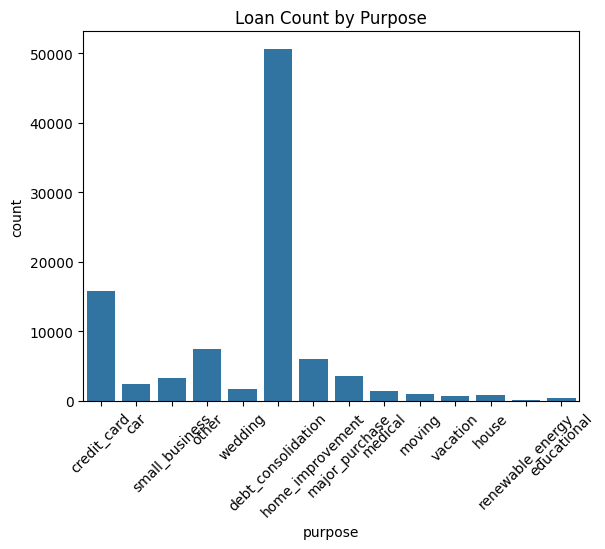

In [ ]:
sns.countplot(data=df, x='purpose')
plt.xticks(rotation=45)
plt.title('Loan Count by Purpose')
plt.show()


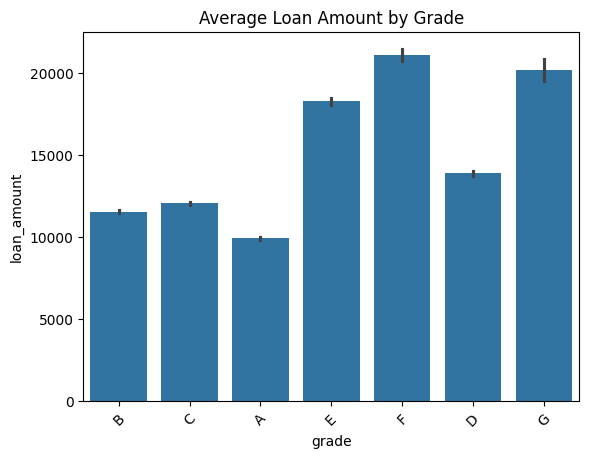

In [ ]:
import numpy as np
sns.barplot(data=df, x='grade', y='loan_amount', estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average Loan Amount by Grade')
plt.show()


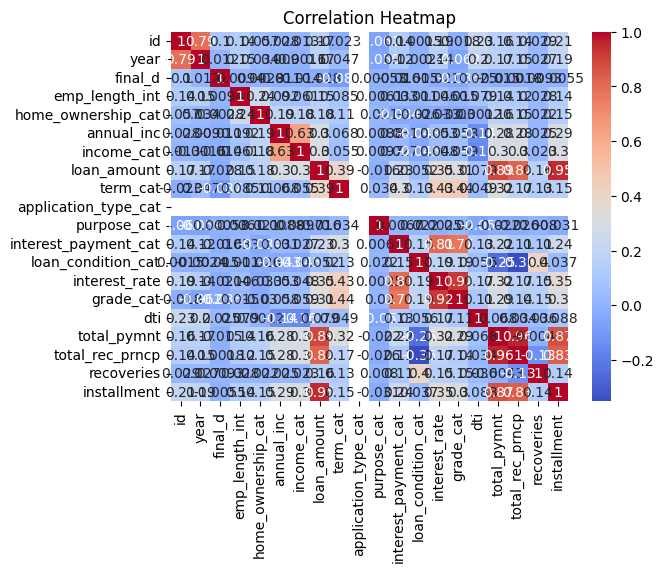

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num = df.select_dtypes(include='number')
corr = num.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


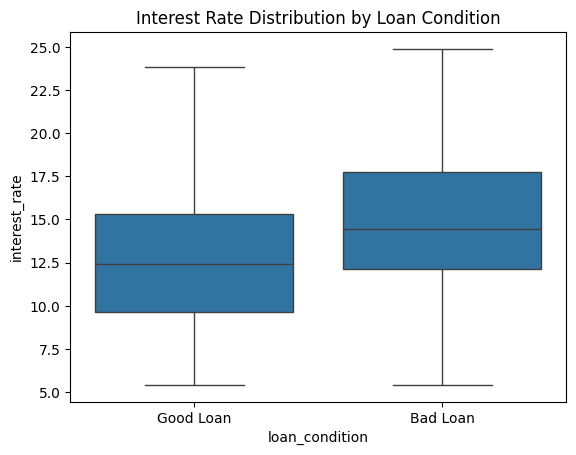

In [ ]:
sns.boxplot(data=df, x='loan_condition', y='interest_rate', showfliers=False)
plt.title('Interest Rate Distribution by Loan Condition')
plt.show()


In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['Year-Month'] = df['issue_d'].dt.strftime('%Y-%m')
monthly_payments = df.groupby('Year-Month')['total_pymnt'].sum()
monthly_payments.plot()
plt.title('Monthly Total Payments Over Time')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='loan_amount', y='interest_rate', z='grade',
                  color='loan_condition')
fig.update_layout(scene = dict(
                    xaxis = dict(title  = 'Loan Amount'),
                    yaxis = dict(title  = 'Interest Rate'),
                    zaxis = dict(title  = 'Grade')))
fig.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95902 entries, 0 to 95901
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    95902 non-null  int64         
 1   year                  95902 non-null  int64         
 2   issue_d               95902 non-null  datetime64[ns]
 3   final_d               95902 non-null  int64         
 4   emp_length_int        95902 non-null  float64       
 5   home_ownership        95902 non-null  object        
 6   home_ownership_cat    95902 non-null  int64         
 7   income_category       95902 non-null  object        
 8   annual_inc            95902 non-null  int64         
 9   income_cat            95902 non-null  int64         
 10  loan_amount           95902 non-null  int64         
 11  term                  95902 non-null  object        
 12  term_cat              95902 non-null  int64         
 13  application_type

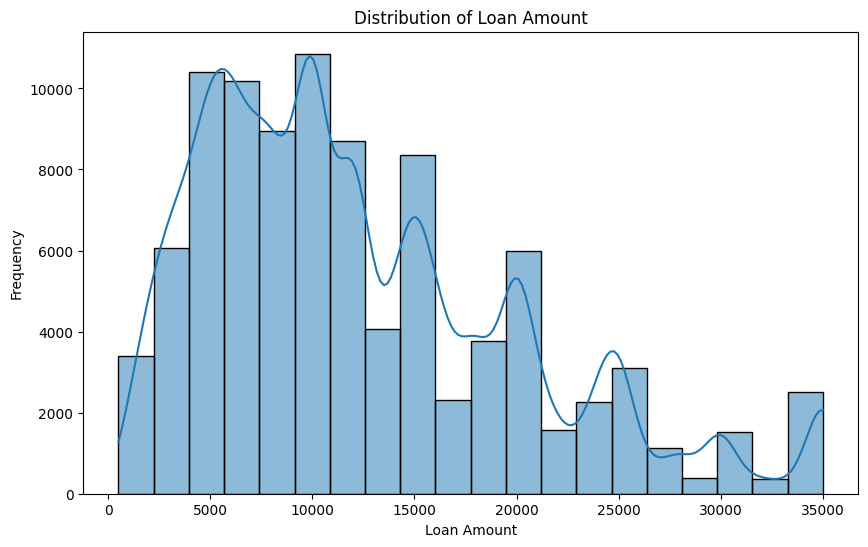

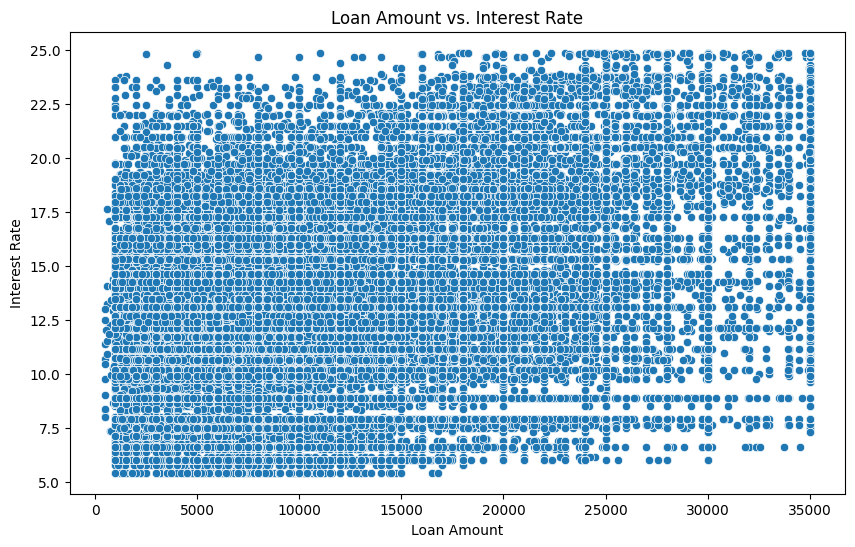

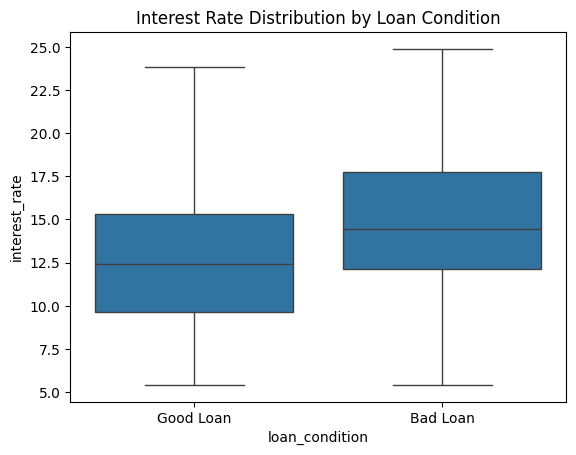

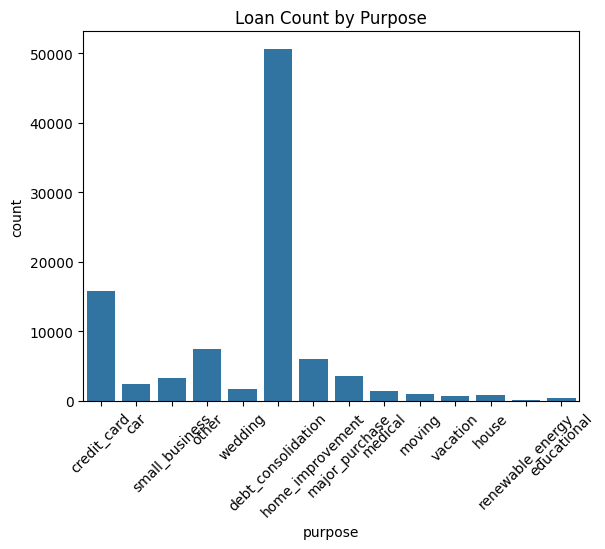

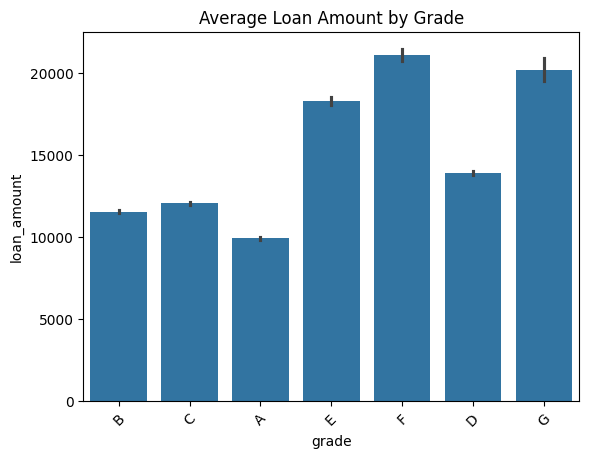

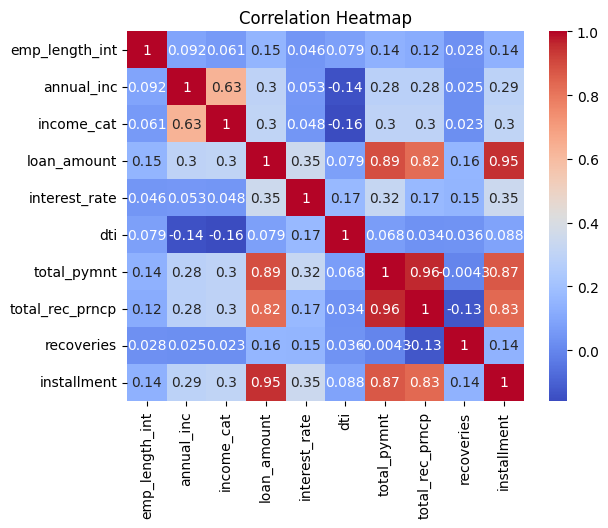

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


# Load the data into a pandas DataFrame
df = pd.read_excel('/content/samplebankloandata.xlsx')

#print the dataset
df

# Display basic information about the DataFrame
print(df.info())

# Display summary statistics for numeric columns
print(df.describe())

#to check unique values
print(df.nunique())
# Check for missing values
print(df.isnull().sum())

# Convert data.describe() to DataFrame
describe_df = pd.DataFrame(df.describe())

# Print the DataFrames
print(describe_df)

data_types = df.dtypes

# Filter columns with object or categorical data types
categorical_vars = data_types[data_types == 'object'].index.tolist() + \
                   data_types[data_types == 'category'].index.tolist()

print("Categorical variables:", categorical_vars)
# Drop irrelevant columns
irrelevant_columns = ['id', 'year', 'issue_d', 'final_d', 'home_ownership_cat', 'income_category', 'term_cat', 'application_type_cat', 'purpose_cat', 'interest_payment_cat', 'loan_condition_cat', 'grade_cat', 'region']
df = df.drop(columns=irrelevant_columns)

# Univariate Analysis

# Histogram of Loan Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amount'], bins=20, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis

# Scatter plot of Loan Amount vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amount', y='interest_rate', data=df)
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

#Box plot

sns.boxplot(data=df, x='loan_condition', y='interest_rate', showfliers=False)
plt.title('Interest Rate Distribution by Loan Condition')
plt.show()

#count plot

sns.countplot(data=df, x='purpose')
plt.xticks(rotation=45)
plt.title('Loan Count by Purpose')
plt.show()

#average using meaan
sns.barplot(data=df, x='grade', y='loan_amount', estimator=np.mean)
plt.xticks(rotation=45)
plt.title('Average Loan Amount by Grade')
plt.show()



# Multivariate Analysis

# Heatmap of Correlation Matrix

num = df.select_dtypes(include='number')
corr = num.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# pie chart
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_variable = 'purpose'

# Create the pie chart using Plotly
fig = px.pie(df, names=categorical_variable, title=f'Distribution of {categorical_variable}')
fig.show()


#3D graph

fig = px.scatter_3d(df, x='loan_amount', y='interest_rate', z='grade',
                  color='loan_condition')
fig.update_layout(scene = dict(
                    xaxis = dict(title  = 'Loan Amount'),
                    yaxis = dict(title  = 'Interest Rate'),
                    zaxis = dict(title  = 'Grade')))
fig.show()

